In [1]:
import rubin_sim.maf.metricBundles as metricBundles
import rubin_sim.maf.slicers as slicers
import rubin_sim.maf.db as db
import rubin_sim.maf.utils as utils
import rubin_sim.maf.metrics as metrics
import sqlite3
import numpy as np
from rubin_sim.maf.metrics.snNSNMetric import SNNSNMetric
import healpy as hp
%matplotlib inline
import glob


In [2]:
dbfiles = glob.glob('baseline*nexp2*10yrs.db')
dbfiles.sort()

In [3]:
dbfiles

['baseline_nexp2_v1.7.1_10yrs.db', 'baseline_nexp2_v1.7_10yrs.db']

Loading  /Users/yoachim/rubin_sim_data/maf/SNe_data/LC_-2.0_0.2_380.0_800.0_ebvofMW_0.0_vstack.hdf5 g 18174 699 26
Loading  /Users/yoachim/rubin_sim_data/maf/SNe_data/LC_-2.0_0.2_380.0_800.0_ebvofMW_0.0_vstack.hdf5 i 68502 699 98
Loading  /Users/yoachim/rubin_sim_data/maf/SNe_data/LC_-2.0_0.2_380.0_800.0_ebvofMW_0.0_vstack.hdf5 r 44037 699 63
Loading  /Users/yoachim/rubin_sim_data/maf/SNe_data/LC_-2.0_0.2_380.0_800.0_ebvofMW_0.0_vstack.hdf5 y 54522 699 78
Loading  /Users/yoachim/rubin_sim_data/maf/SNe_data/LC_-2.0_0.2_380.0_800.0_ebvofMW_0.0_vstack.hdf5 z 63609 699 91
Loading  /Users/yoachim/rubin_sim_data/maf/SNe_data/LC_0.0_0.0_380.0_800.0_ebvofMW_0.0_vstack.hdf5 g 18174 699 26
Loading  /Users/yoachim/rubin_sim_data/maf/SNe_data/LC_0.0_0.0_380.0_800.0_ebvofMW_0.0_vstack.hdf5 i 68502 699 98
Loading  /Users/yoachim/rubin_sim_data/maf/SNe_data/LC_0.0_0.0_380.0_800.0_ebvofMW_0.0_vstack.hdf5 r 44037 699 63
Loading  /Users/yoachim/rubin_sim_data/maf/SNe_data/LC_0.0_0.0_380.0_800.0_ebvofMW_

/Users/yoachim/git_repos/rubin_sim/rubin_sim/maf/plots/plotHandler.py:518: UserWarning: Cannot plot object metric values with this plotter.
  warnings.warn('Cannot plot object metric values with this plotter.')
/Users/yoachim/anaconda3/envs/testenv/lib/python3.9/site-packages/healpy/projaxes.py:202: MatplotlibDeprecationWarning: Passing parameters norm and vmin/vmax simultaneously is deprecated since 3.3 and will become an error two minor releases later. Please pass vmin/vmax directly to the norm when creating it.
  aximg = self.imshow(
/Users/yoachim/anaconda3/envs/testenv/lib/python3.9/site-packages/healpy/projaxes.py:202: MatplotlibDeprecationWarning: Passing parameters norm and vmin/vmax simultaneously is deprecated since 3.3 and will become an error two minor releases later. Please pass vmin/vmax directly to the norm when creating it.
  aximg = self.imshow(
/Users/yoachim/git_repos/rubin_sim/rubin_sim/maf/utils/mafUtils.py:104: RuntimeWarning: divide by zero encountered in double_

Plotting complete.
baseline_nexp2_v1.7.1 {'Mean': 286.18456603773586, 'Median': 297.787, 'Sum': 30335.564} {'Mean': 0.23207547169811316, 'Median': 0.25, 'Sum': 24.599999999999994}


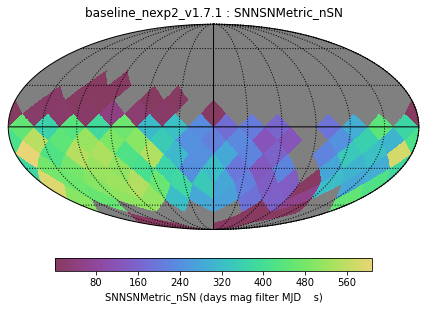

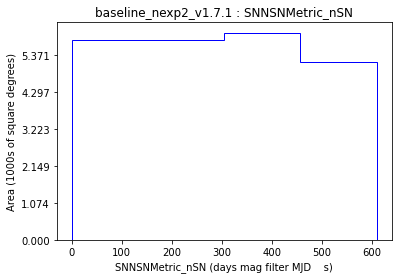

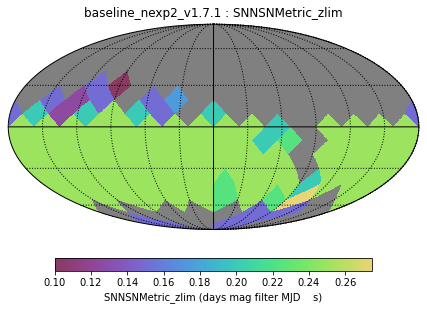

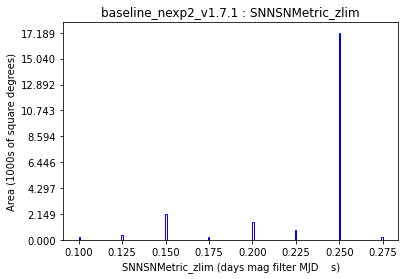

In [4]:
nside = 4
sql = ''
# what is this zlim thingy?
#metric = SNNSNMetric( verbose=False, zlim_coeff=0.98)
metric = SNNSNMetric( verbose=False)
result_list = []
for filename in [dbfiles[0]]:
    opsimdb = db.OpsimDatabase(filename)
    runname = filename.replace('_10yrs.db', '')
    bundleList = []
    slicer = slicers.HealpixSlicer(nside=nside)
    resultsDb = db.ResultsDb(outDir=runname)
    summaryStats = [metrics.MeanMetric(), metrics.MedianMetric(), metrics.SumMetric()]

    bundleList.append(metricBundles.MetricBundle(metric, slicer,sql,runName=runname, summaryMetrics=summaryStats))
    outDir = runname
    resultsDb = db.ResultsDb(outDir=outDir)
    bundleDict = metricBundles.makeBundlesDictFromList(bundleList)
    bgroup = metricBundles.MetricBundleGroup(bundleDict, opsimdb, outDir=outDir, resultsDb=resultsDb)
    bgroup.runAll()
    bgroup.plotAll(closefigs=False)
    print(runname, bundleDict['SNNSNMetric_nSN'].summaryValues, bundleDict['SNNSNMetric_zlim'].summaryValues)
    result_list.append((runname, bundleDict['SNNSNMetric_nSN'].summaryValues, bundleDict['SNNSNMetric_zlim'].summaryValues))
    

/Users/yoachim/anaconda3/envs/testenv/lib/python3.9/site-packages/healpy/projaxes.py:920: MatplotlibDeprecationWarning: You are modifying the state of a globally registered colormap. This has been deprecated since 3.3 and in 3.6, you will not be able to modify a registered colormap in-place. To remove this warning, you can make a copy of the colormap first. cmap = mpl.cm.get_cmap("viridis").copy()
  newcm.set_over(newcm(1.0))
/Users/yoachim/anaconda3/envs/testenv/lib/python3.9/site-packages/healpy/projaxes.py:921: MatplotlibDeprecationWarning: You are modifying the state of a globally registered colormap. This has been deprecated since 3.3 and in 3.6, you will not be able to modify a registered colormap in-place. To remove this warning, you can make a copy of the colormap first. cmap = mpl.cm.get_cmap("viridis").copy()
  newcm.set_under(bgcolor)
/Users/yoachim/anaconda3/envs/testenv/lib/python3.9/site-packages/healpy/projaxes.py:922: MatplotlibDeprecationWarning: You are modifying the 

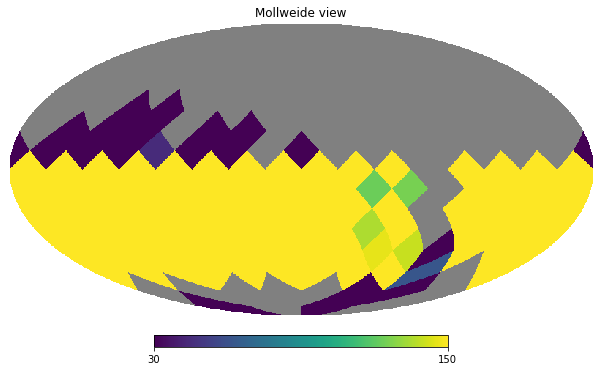

In [5]:
hp.mollview(bgroup.bundleDict['SNNSNMetric_nSN'].metricValues, max=150, min=30)

Loading  /Users/yoachim/rubin_sim_data/maf/SNe_data/LC_-2.0_0.2_380.0_800.0_ebvofMW_0.0_vstack.hdf5 g 18174 699 26
Loading  /Users/yoachim/rubin_sim_data/maf/SNe_data/LC_-2.0_0.2_380.0_800.0_ebvofMW_0.0_vstack.hdf5 i 68502 699 98
Loading  /Users/yoachim/rubin_sim_data/maf/SNe_data/LC_-2.0_0.2_380.0_800.0_ebvofMW_0.0_vstack.hdf5 r 44037 699 63
Loading  /Users/yoachim/rubin_sim_data/maf/SNe_data/LC_-2.0_0.2_380.0_800.0_ebvofMW_0.0_vstack.hdf5 y 54522 699 78
Loading  /Users/yoachim/rubin_sim_data/maf/SNe_data/LC_-2.0_0.2_380.0_800.0_ebvofMW_0.0_vstack.hdf5 z 63609 699 91
Loading  /Users/yoachim/rubin_sim_data/maf/SNe_data/LC_0.0_0.0_380.0_800.0_ebvofMW_0.0_vstack.hdf5 g 18174 699 26
Loading  /Users/yoachim/rubin_sim_data/maf/SNe_data/LC_0.0_0.0_380.0_800.0_ebvofMW_0.0_vstack.hdf5 i 68502 699 98
Loading  /Users/yoachim/rubin_sim_data/maf/SNe_data/LC_0.0_0.0_380.0_800.0_ebvofMW_0.0_vstack.hdf5 r 44037 699 63
Loading  /Users/yoachim/rubin_sim_data/maf/SNe_data/LC_0.0_0.0_380.0_800.0_ebvofMW_

/Users/yoachim/git_repos/rubin_sim/rubin_sim/maf/plots/plotHandler.py:518: UserWarning: Cannot plot object metric values with this plotter.
  warnings.warn('Cannot plot object metric values with this plotter.')
/Users/yoachim/anaconda3/envs/testenv/lib/python3.9/site-packages/healpy/projaxes.py:202: MatplotlibDeprecationWarning: Passing parameters norm and vmin/vmax simultaneously is deprecated since 3.3 and will become an error two minor releases later. Please pass vmin/vmax directly to the norm when creating it.
  aximg = self.imshow(
/Users/yoachim/anaconda3/envs/testenv/lib/python3.9/site-packages/healpy/projaxes.py:202: MatplotlibDeprecationWarning: Passing parameters norm and vmin/vmax simultaneously is deprecated since 3.3 and will become an error two minor releases later. Please pass vmin/vmax directly to the norm when creating it.
  aximg = self.imshow(
/Users/yoachim/git_repos/rubin_sim/rubin_sim/maf/utils/mafUtils.py:104: RuntimeWarning: divide by zero encountered in double_

Plotting complete.
baseline_nexp2_v1.7.1 {'Mean': 18.109227432590853, 'Median': 17.5785, 'Sum': 30894.341999999997} {'Mean': 0.2369958968347011, 'Median': 0.25, 'Sum': 404.31500000000005}


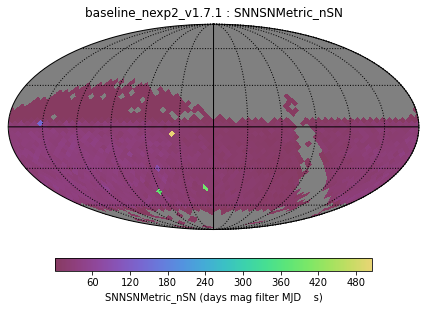

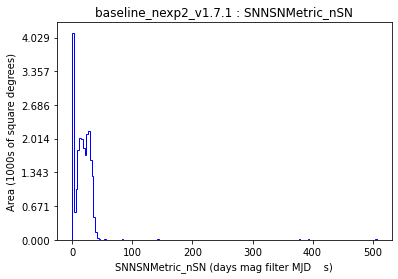

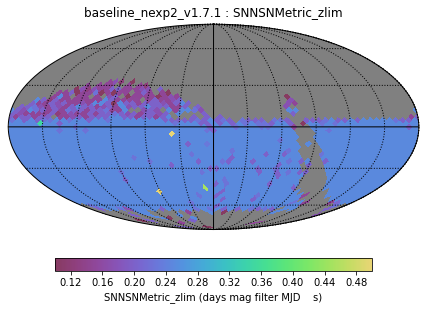

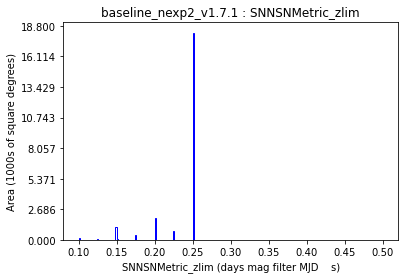

In [6]:
nside = 16
sql = ''
# what is this zlim thingy?
#metric = SNNSNMetric( verbose=False, zlim_coeff=0.98)
metric = SNNSNMetric( verbose=False)
result_list = []
for filename in [dbfiles[0]]:
    opsimdb = db.OpsimDatabase(filename)
    runname = filename.replace('_10yrs.db', '')
    bundleList = []
    slicer = slicers.HealpixSlicer(nside=nside)
    resultsDb = db.ResultsDb(outDir=runname)
    summaryStats = [metrics.MeanMetric(), metrics.MedianMetric(), metrics.SumMetric()]

    bundleList.append(metricBundles.MetricBundle(metric, slicer,sql,runName=runname, summaryMetrics=summaryStats))
    outDir = runname
    resultsDb = db.ResultsDb(outDir=outDir)
    bundleDict = metricBundles.makeBundlesDictFromList(bundleList)
    bgroup = metricBundles.MetricBundleGroup(bundleDict, opsimdb, outDir=outDir, resultsDb=resultsDb)
    bgroup.runAll()
    bgroup.plotAll(closefigs=False)
    print(runname, bundleDict['SNNSNMetric_nSN'].summaryValues, bundleDict['SNNSNMetric_zlim'].summaryValues)
    result_list.append((runname, bundleDict['SNNSNMetric_nSN'].summaryValues, bundleDict['SNNSNMetric_zlim'].summaryValues))
    

/Users/yoachim/anaconda3/envs/testenv/lib/python3.9/site-packages/healpy/projaxes.py:920: MatplotlibDeprecationWarning: You are modifying the state of a globally registered colormap. This has been deprecated since 3.3 and in 3.6, you will not be able to modify a registered colormap in-place. To remove this warning, you can make a copy of the colormap first. cmap = mpl.cm.get_cmap("viridis").copy()
  newcm.set_over(newcm(1.0))
/Users/yoachim/anaconda3/envs/testenv/lib/python3.9/site-packages/healpy/projaxes.py:921: MatplotlibDeprecationWarning: You are modifying the state of a globally registered colormap. This has been deprecated since 3.3 and in 3.6, you will not be able to modify a registered colormap in-place. To remove this warning, you can make a copy of the colormap first. cmap = mpl.cm.get_cmap("viridis").copy()
  newcm.set_under(bgcolor)
/Users/yoachim/anaconda3/envs/testenv/lib/python3.9/site-packages/healpy/projaxes.py:922: MatplotlibDeprecationWarning: You are modifying the 

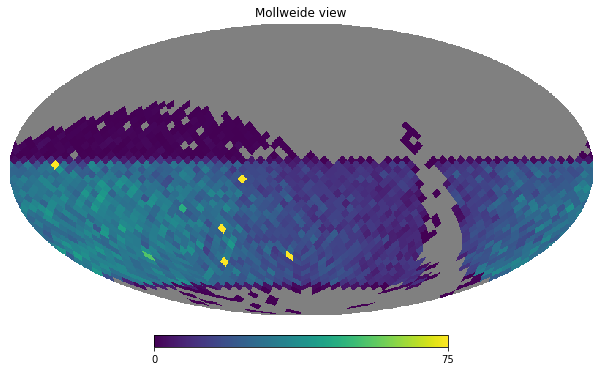

In [7]:
hp.mollview(bgroup.bundleDict['SNNSNMetric_nSN'].metricValues, max=75, min=0)